In [86]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [87]:
df = pd.read_csv(r'C:\Users\ashna\OneDrive\Documents\School\UMGC\Capstone Two - Final Project\Prediction of Student success\dataset.csv')

In [88]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [89]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [90]:
import category_encoders as ce


encoder = ce.OneHotEncoder(cols=['Target'], use_cat_names=True,
                        return_df=True)

data_encoded=encoder.fit_transform(df)
data_encoded

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Graduate,Target_Enrolled
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,0,1,0
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,1,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.666667,0,15.5,2.8,-4.06,0,1,0
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.000000,0,11.1,0.6,2.02,1,0,0
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.500000,0,13.9,-0.3,0.79,1,0,0
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.000000,0,9.4,-0.8,-3.12,0,1,0


In [97]:
X = data_encoded[['Mother\'s occupation', 'Educational special needs']]
y = data_encoded['Target_Dropout']

In [98]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_encoded[['Mother\'s occupation', 'Educational special needs']], data_encoded['Target_Dropout'], test_size=.2, random_state=1)

In [100]:
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [101]:
training_accuracy = []
test_accuracy = []
accuracy_difference = []

learning_rates = [1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    y_predict_training = gb.predict(X_train)
    y_predict_test = gb.predict(X_test)
    tr_accuracy = accuracy_score(y_predict_training, y_train)
training_accuracy.append(tr_accuracy)
tst_accuracy = accuracy_score(y_predict_test, y_test)
test_accuracy.append(tst_accuracy)
accuracy_difference.append(tst_accuracy - tr_accuracy)

print(test_accuracy)
print(training_accuracy)


[0.7050847457627119]
[0.6987849675049449]


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.70      0.98      0.81      2392
           1       0.71      0.12      0.21      1147

    accuracy                           0.70      3539
   macro avg       0.70      0.55      0.51      3539
weighted avg       0.70      0.70      0.62      3539

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       611
           1       0.64      0.11      0.19       274

    accuracy                           0.71       885
   macro avg       0.67      0.54      0.50       885
weighted avg       0.69      0.71      0.62       885



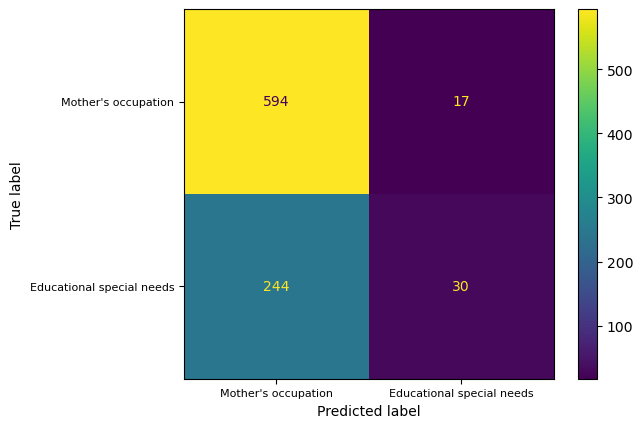

In [102]:

cm = confusion_matrix(y_test, y_predict_test, labels = gb.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Mother\'s occupation', 'Educational special needs'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Mother\'s occupation', 'Educational special needs'], fontsize = 8)
ax.set_yticklabels(labels = ['Mother\'s occupation', 'Educational special needs'], fontsize = 8)
display_cm.plot(ax = ax)



print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))
#
print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))